In [12]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize
import os

from JJ_data_processing import *
from JJformulas import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

from scipy.optimize import curve_fit


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

In [80]:
def populate_exps (exps, VERBOSE = False):

    texps = tqdm_notebook(exps)
    for exp in texps:

        Isws = []
        R0s = []

        if VERBOSE:
            fig, ax = plt.subplots()

        Is = []
        Vs = []

        Irs = []
        Vrs = []

        Ils = []
        Vls = []

        for i in exp['ids']:

            I, V = xy_by_id(i)

            Tb = exp['T']

            ind_Vmax = np.argmax(I)
            ind_Vmin = np.argmin(I)
            
            I -= 2.22e-9

            ind_I0 = np.argmin(abs(I - 0e-12))
            ind_near0 = np.where(abs(I) < 10e-12)


    #         V_off = (V[ind_Vmax] + V[ind_Vmin])/2

#             V_off = V[ind_I0]
            V_off = np.mean(V[ind_near0])


            V -= V_off

#             I, V = offsetRemove(I,V, offX = 25.5e-10, offY = 0e-6)


#             I, V = cut_dxdy(I, V, dx = 50e-9 ,dy = 3e-3)
            I, V = cut_dxdy(I, V, dx = 50e-9 ,dy = 50e-6)

    #         I = I - Iqp(  V, T = Tb, G1 = 1/20.06e3, G2 = 1/120e3, V0 = 0.35e-3 ) 

            g0 = np.where(I>0)
            l0 = np.where(I<0)

            Ir, Vr = I[g0], V[g0]
            Il, Vl = I[l0], V[l0]


            if VERBOSE:
                ax.plot(I,V, 'o')

            Isw, R0 = extract_Isw_R0 (I,V)
            Isws.append(Isw)
            R0s.append(R0)


            Is.append(I)
            Vs.append(V)

            Irs.append(Ir)
            Vrs.append(Vr)

            Ils.append(Il)
            Vls.append(Vl)



        exp ['Is' ] =  Is
        exp ['Vs' ] =  Vs

        exp ['Irs' ] =  Irs
        exp ['Vrs' ] =  Vrs

        exp ['Ils' ] =  Ils
        exp ['Vls' ] =  Vls



        exp ['Isws'] =  np.array(Isws)
        exp ['R0s' ] =  np.array(R0s )
        exp ['cos' ] =  np.array( abs(np.cos(np.pi*(exp['B'] - ZF )/(2* (FF - ZF)  )) ) )


# 74N4

In [5]:
SAMPLE = '74N4'

qc.config["core"]["db_location"] = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)

<IPython.core.display.Javascript object>


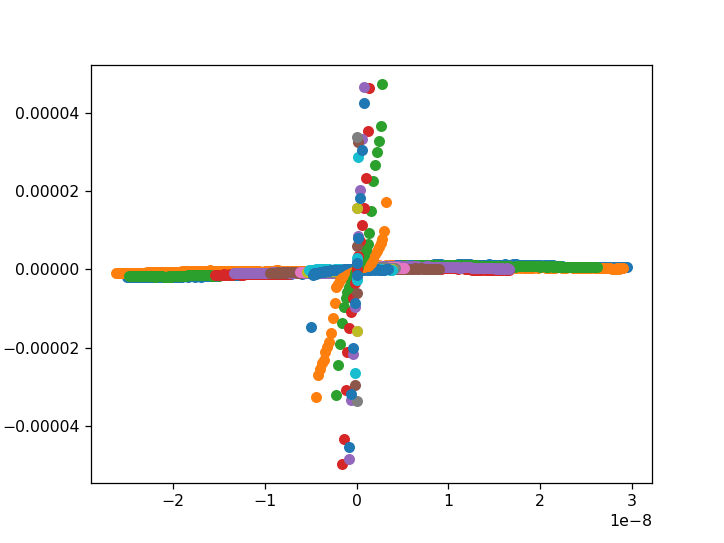

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  R0 = np.mean(np.diff(Vs[n_sl])) / np.mean(np.diff(Is[n_sl]))


<IPython.core.display.Javascript object>


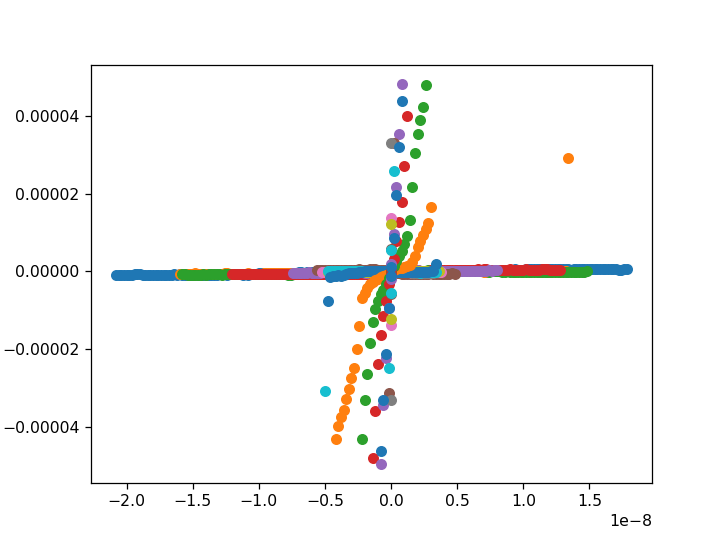

<IPython.core.display.Javascript object>


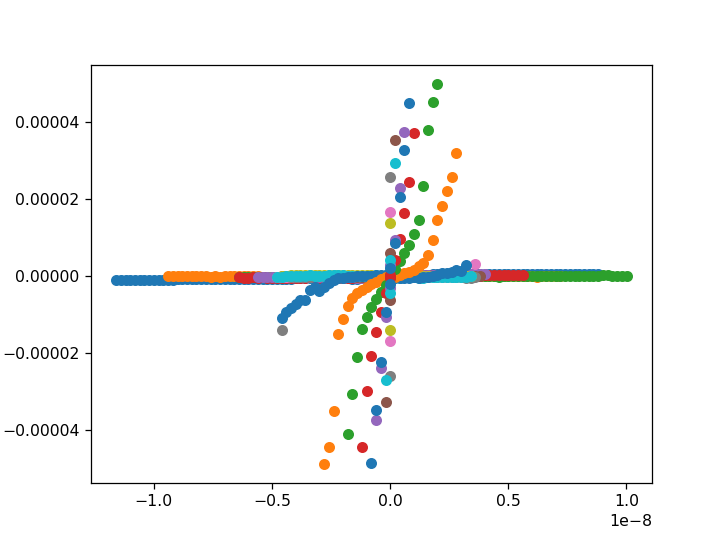

<IPython.core.display.Javascript object>


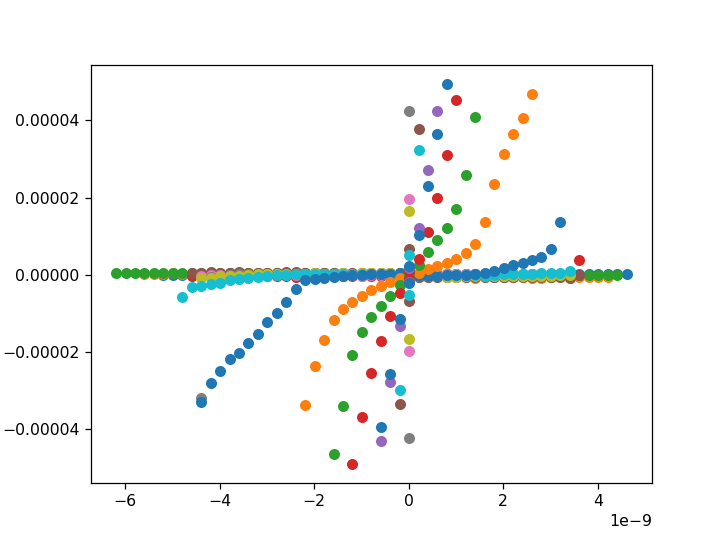

<IPython.core.display.Javascript object>


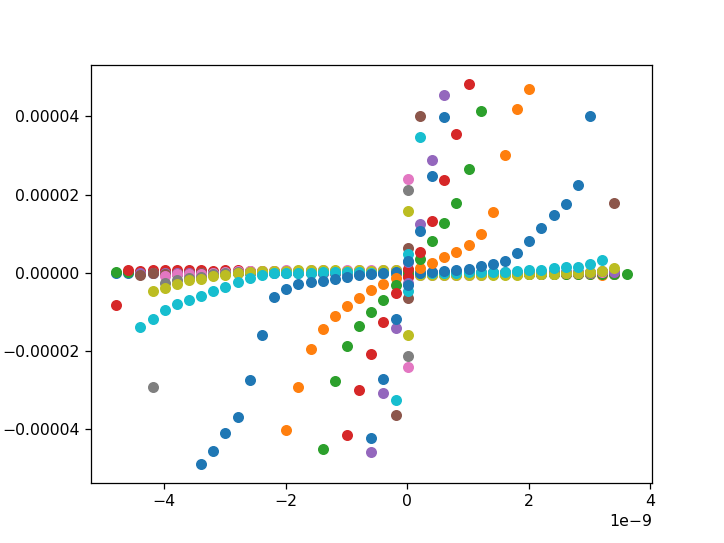

<IPython.core.display.Javascript object>


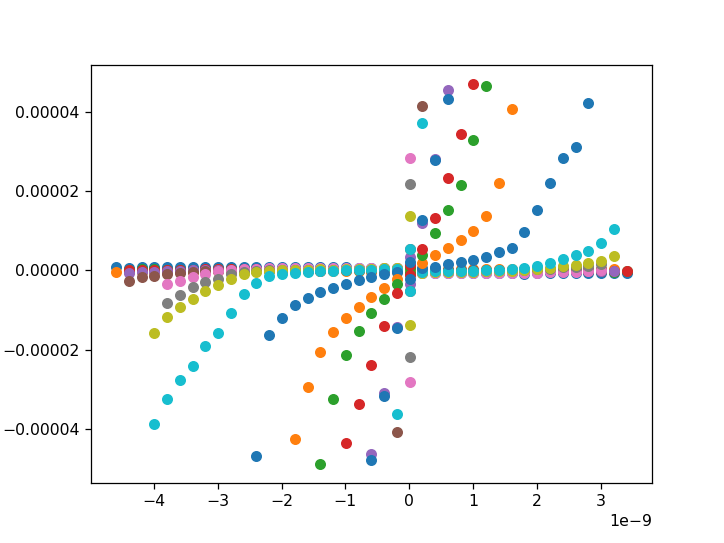

<IPython.core.display.Javascript object>


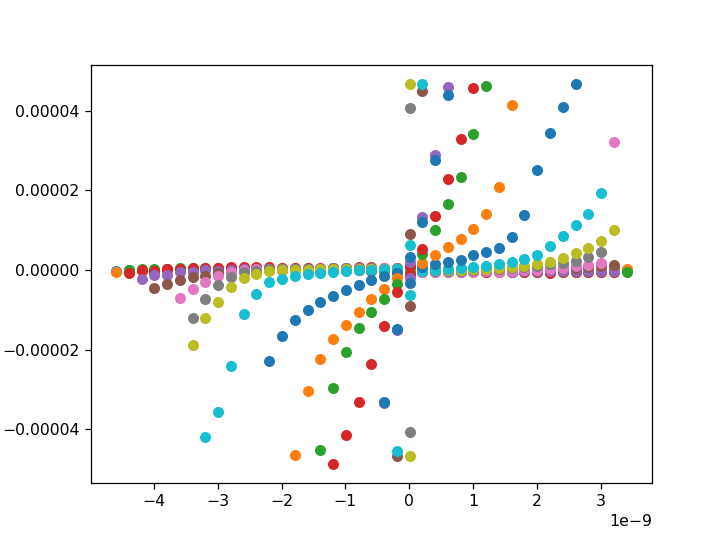

<IPython.core.display.Javascript object>


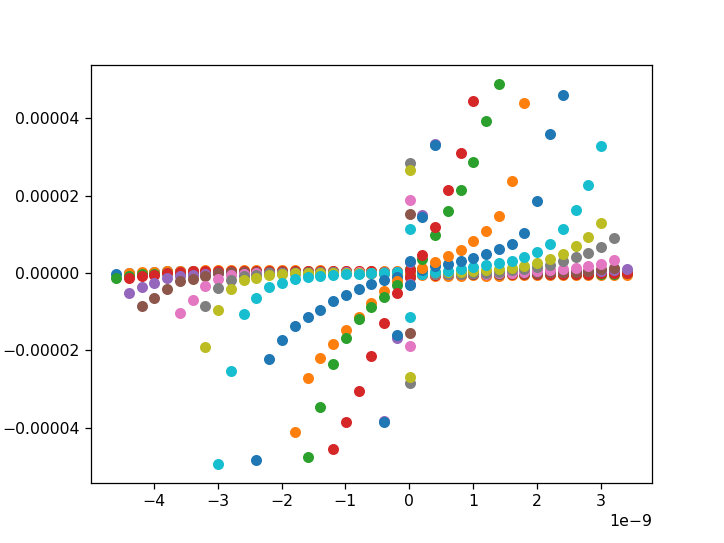

<IPython.core.display.Javascript object>


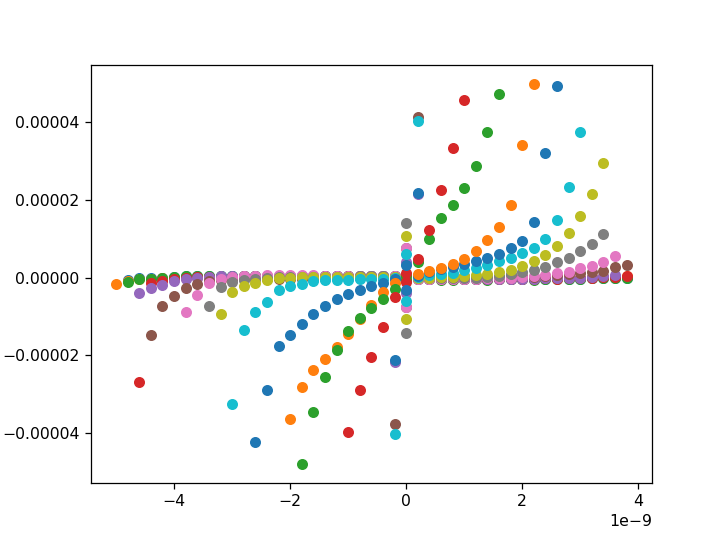

<IPython.core.display.Javascript object>


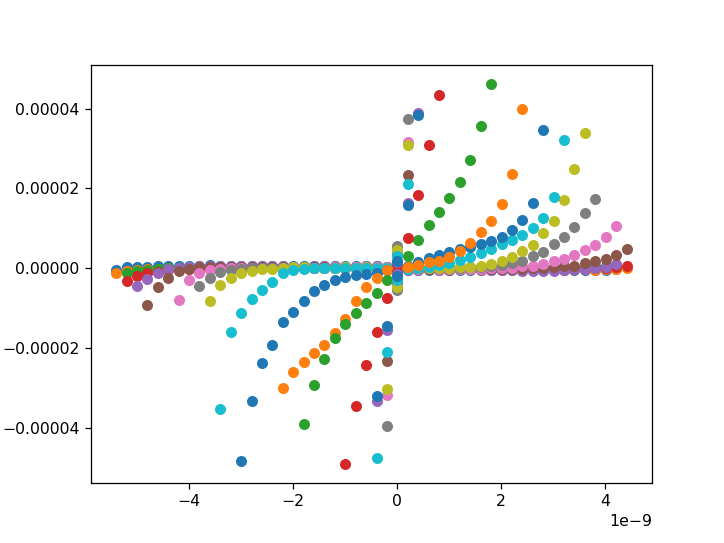

<IPython.core.display.Javascript object>


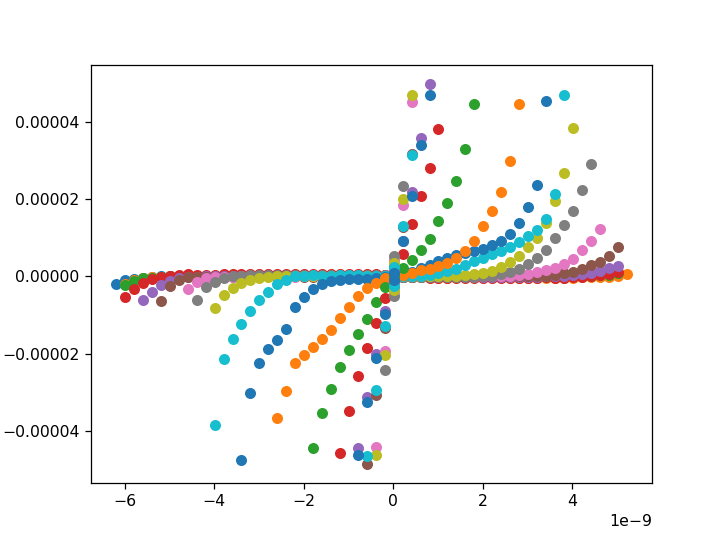

In [81]:
ZF =  0.004e-3
FF =  0.224e-3
dF = 0.250e-3
midF = 0.154e-3
# import pandas as pd
# pd.set_option("display.precision", 3)

keys = [                  'ids', 'T',    'B',                                  'Vthr', 'comments'        ]  
valss = [#[              [8,9,10],  43e-3,np.array( [ZF,midF,FF] )            ,   4e-3, 'quick IVc meas'  ],  
#        [                  [13],  43e-3, udu_list(amp=0.500e-3, stp=0.005e-3),   4e-3, ''                ],  
       [range(  22,   42+1)[:],  50e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range(  43,   63+1)[:], 100e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range(  64,   84+1)[:], 150e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range(  85,  105+1)[:], 200e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 106,  126+1)[:], 250e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 127,  147+1)[:], 300e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 148,  168+1)[:], 350e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 169,  189+1)[:], 400e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 190,  210+1)[:], 450e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 211,  231+1)[:], 500e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range( 232,  252+1)[:], 550e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ]]  
#        [range( 253,  262+1)[:],  43e-3,                               ZF    ,   4e-3, 'repeated IVc_ada'],  
#        [range( 263,  272+1)[:],  43e-3,                               ZF    ,   4e-3, 'repeated IVc'    ],  
#        [range( 273,  282+1)[:],  43e-3,                               ZF    ,   4e-3, 'repeated IVc'    ]]    
        
# exps = pd.DataFrame(  data = list(zip(*lst)), 
#                    columns = range(len(lst)),
#                      index = key )
# exps[5]['T']


# exps.transpose()[exps.transpose()['T'] == 350e-3]['ids'].tolist()[0]
exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

populate_exps (exps, VERBOSE = True)
# populate_exps (exps)

<IPython.core.display.Javascript object>


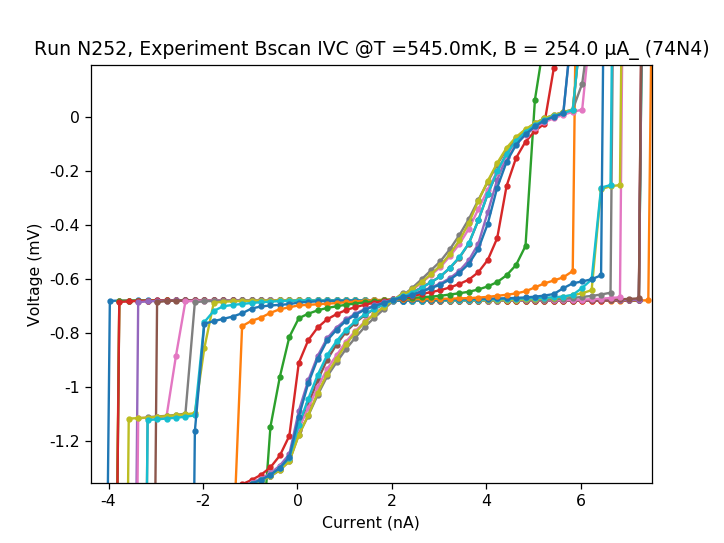

In [74]:
fig, ax = plt.subplots()
exp = exps[-1]
for cos in exp['cos']:
    ind = load_by_key(exp, 'cos', cos )
    
    plot_by_id(exp['ids'][ind], ax, marker = '.', ls ='-')
#     plot_by_key(exp, 'cos', cos, ax, ls = '')

## Isw(cos)

<IPython.core.display.Javascript object>


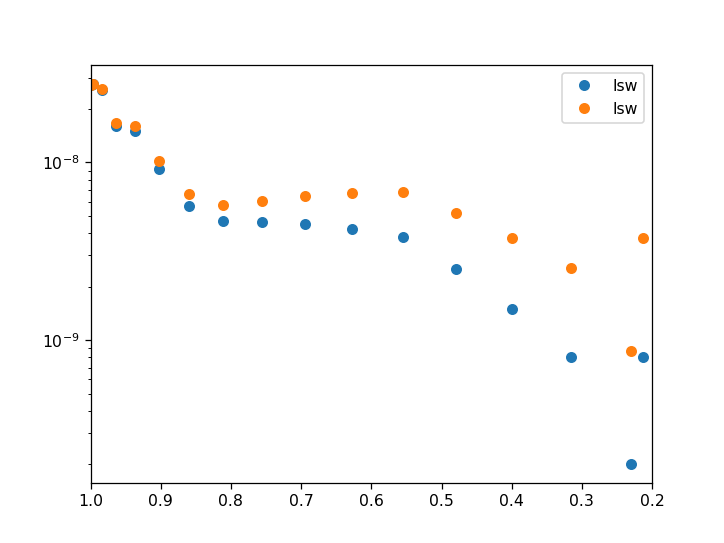

In [82]:
fig, ax = plt.subplots()

exp = exps[0]


ax.plot(exp ['cos' ] , exp['Isws'], 'o', label = 'Isw')

ax.plot(exp ['cos' ], exp['Isws']/exp ['cos' ], 'o', label = 'Isw')
ax.set_yscale('log')


ax.set_xlim(1,0.2)

    
ax.legend()


<IPython.core.display.Javascript object>


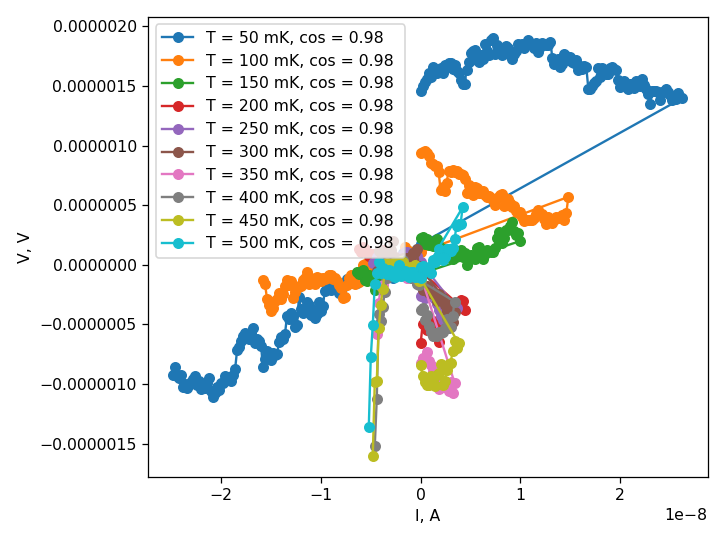

In [48]:
fig, ax = plt.subplots()
ax.set_xlabel('I, A')
ax.set_ylabel('V, V')

cos = 0.99
for exp in exps[:-1]:
    I, V = plot_by_key(exp, 'cos', cos, ax, ls = '-')
    ind = load_by_key(exp, 'cos', cos)

#     plot_by_id(exp['ids'][ind], ax, marker = '.')
#     ax.plot(abs(I + 100e-12), abs(V), '.')

#     ax.plot(-abs(I + 0e-12), -abs(V), '.')

plt.tight_layout()

<IPython.core.display.Javascript object>


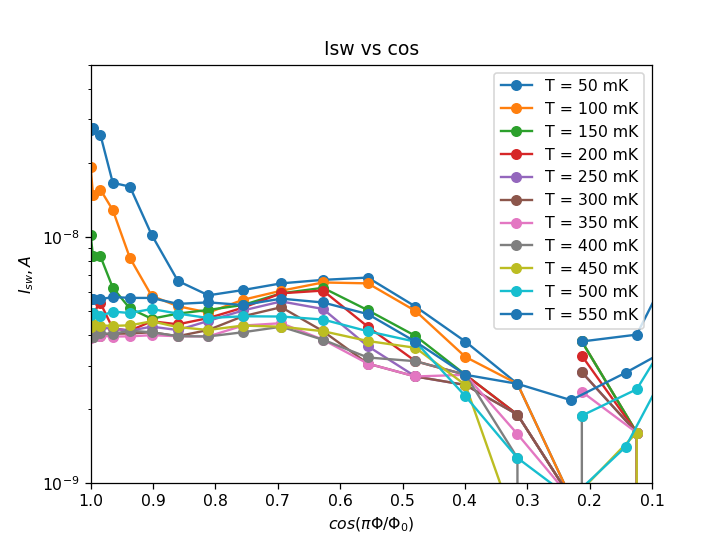

In [83]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(15)]


for i, exp in enumerate(exps[:]):

#     cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

#     cos = abs(np.pi*(exp['B']-.22e-3 )/2.8e-3) 
    
    
    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.set_title('Isw vs cos' )

    ax.plot(exp['cos'], exp['Isws']/exp['cos'], 'o-', color = cs[i] , label = Tstr)
#     ax.plot(exp['cos'], exp['Isws'], 'o-', color = cs[i] , label = Tstr)
    ax.set_yscale('log')

    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$I_{sw}, A$')
    
    ax.set_xlim(1,0.1)
    ax.set_ylim(1e-9, 50e-9)

    ax.legend()

    
# ax.set_xscale('log')

## Isw(T)

<IPython.core.display.Javascript object>


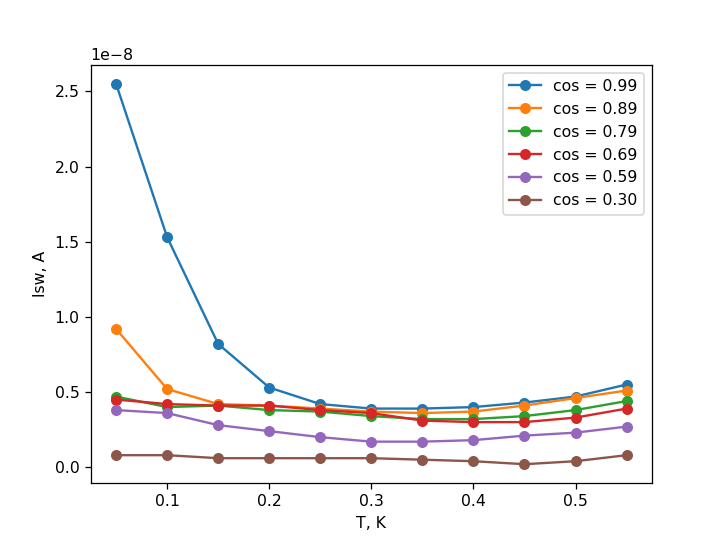

Text(0, 0.5, 'Isw, A')

In [84]:
fig, ax = plt.subplots()

# for cos in [    .3, .25]:    
for cos in [ 0.99, 0.89, 0.79, 0.69, 0.59, .3]:    
    Ts   = [exp['T'] for exp in exps]
    Isws = [exp['Isws'][load_by_key(exp, 'cos', cos)] for exp in exps]

    ax.plot(Ts, Isws, 'o-', label = 'cos = {:1.2f}'.format(cos) )
    
    
ax.legend()

ax.set_xlabel('T, K')
ax.set_ylabel('Isw, A')

# ax.set_yscale('log') 

## R0(T)

<IPython.core.display.Javascript object>


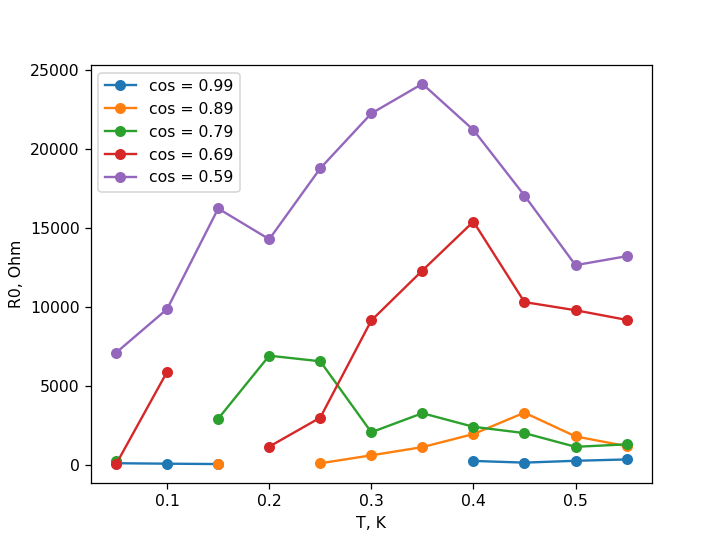

Text(0, 0.5, 'R0, Ohm')

In [87]:
fig, ax = plt.subplots()

for cos in [ 0.99, 0.89, 0.79, 0.69, 0.59]:       
    Ts   = [exp['T'] for exp in exps]
    Isws = [exp['R0s'][load_by_key(exp, 'cos', cos)] for exp in exps]

    ax.plot(Ts, Isws, 'o-',  label = 'cos = {:1.2f}'.format(cos))

# ax.set_yscale('log')    

ax.legend()
ax.set_xlabel('T, K')
ax.set_ylabel('R0, Ohm')

## IVCs (cos)

<IPython.core.display.Javascript object>


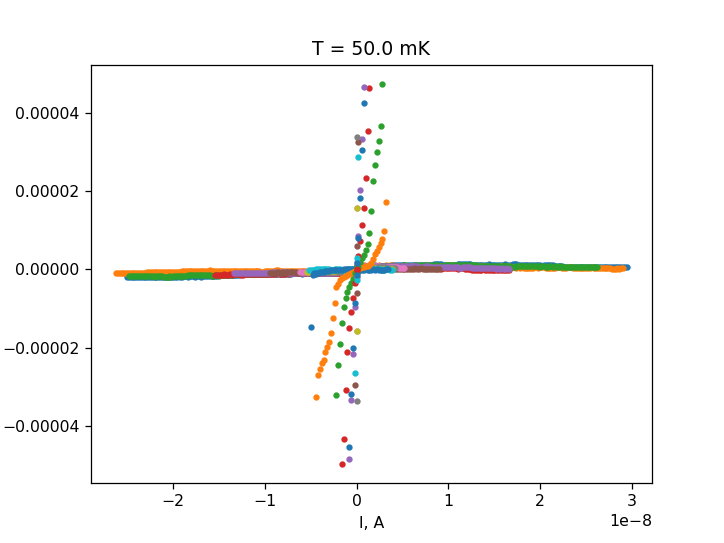

In [89]:
fig, ax = plt.subplots()


exp = exps[0]
for cos in exp['cos']:
    
    plot_by_key(exp, 'cos', cos, ax, marker = '.')
    

ax.set_title('T = {:2.1f} mK'.format(exp['T'] *1e3)) 

ax.set_xlabel('I, A')
ax.set_ylabel('V, V')
    
ax.legend().remove()

# Fitting

<IPython.core.display.Javascript object>


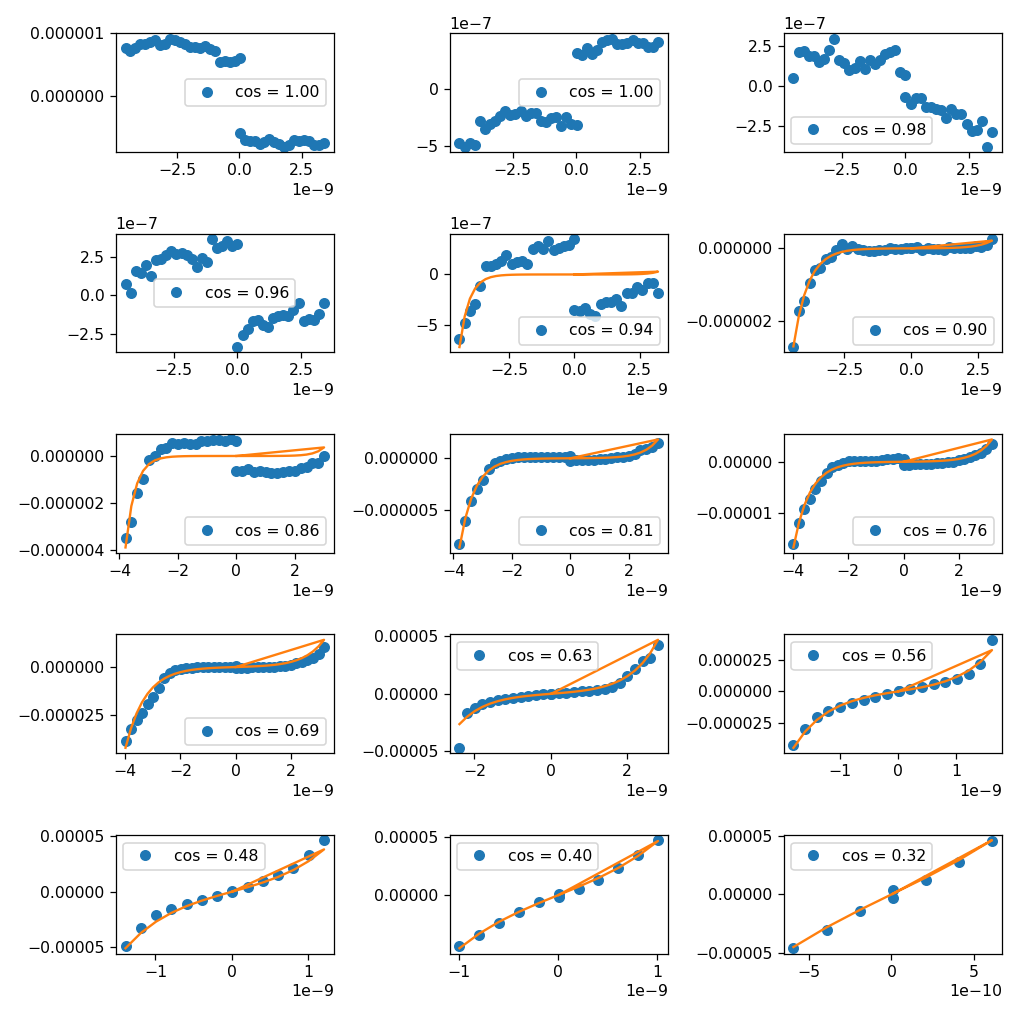

[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[8.28022444e-06 8.79749053e-01]
[0.00167841 0.61156255]
[8.31118060e-05 1.05279024e+00]
[0.00950821 0.73236397]
[0.03550621 0.68020336]
[0.33613336 0.59849637]
[1.88809555 0.6650694 ]
[4.37778436 0.90851259]
[12.85604432  0.93727978]
[25.58346234  1.01210877]
[52.52514731  1.25063327]


In [139]:
R_env = 1e3
Cj = 1.5e-15


EJ0= .04


EJs = []
Tns = []
coss = []

exp = exps[5]

fig = plt.figure(figsize = (9,9))
gs = GridSpec.GridSpec(5, 3)

for i in range(15):
# for i, j in enumerate([0,3,4,5,6,7,8, 11, 12, 14,15,16]):
    
    ax = fig.add_subplot(gs[i] )
    
    j = 1*i+0
    cos = exp['cos'][j]
    I, V = exp['Is'][j] , exp['Vs'][j]
    
    ax.plot( I, V , 'o' ,label = 'cos = {:1.2f}'.format(cos))


    
    Tb = exp['T']
    
    V_fit = lambda x, A,B  : A*np.sinh(x*B*cos/Tb)
    popt1 = ( 1e-6 , 1)
    try:
        popt, pcov = curve_fit(V_fit, I/1e-9 ,V/1e-6, p0 = popt1 )
    except RuntimeError: 
        popt = [np.nan, np.nan]
    

    Vs = V_fit(I/1e-9, *popt)*1e-6

    ax.plot(I, (Vs ))

    print(popt)
    
    EJ, Tn = popt[0], popt[1] 

    EJs.append(EJ)
    Tns.append(Tn)
    coss.append(cos)

    

    ax.legend()
    
    plt.tight_layout()

In [132]:
EJs = []
Tns = []
coss = []

exp = exps[0]

for j, cos in enumerate(exp['cos']):
    
    I, V = exp['Ils'][j] , exp['Vls'][j]
    
    Tb = exp['T']
    
    V_fit = lambda x, A,B  : A*np.sinh(x*B/Tb)
#     V_fit = lambda x, A,B  : A*cos**2*np.sinh(x*B*cos**2/Tb)

    popt1 = ( 1e-3 , 1)
    try:
        popt, pcov = curve_fit(V_fit, I/1e-9 ,V/1e-6, p0 = popt1 )
    except RuntimeError: 
        popt = [np.nan, np.nan]
    except TypeError: 
        popt = [np.nan, np.nan]    

    print(popt, cos)
    
    EJ, Tn = popt[0], popt[1] 

    EJs.append(EJ)
    Tns.append(Tn)
    coss.append(cos)


D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:746: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[-1.78756326e-15  1.00000000e+00] 1.0
[-1.21655448e-15  9.99999998e-01] 0.9960198804080459
[4.11896260e-16 9.99999996e-01] 0.9841112043361161
[1.65995887e-17 9.99999998e-01] 0.9643687676941068
[3.56640537e-16 9.99999995e-01] 0.9369497249997617
[3.52502199e-19 1.00000000e+00] 0.9020723383911214
[-6.60342401e-18  9.99999999e-01] 0.8600142402077006
[2.93388483e-18 1.00000000e+00] 0.8111102229706592
[8.91561538e-18 1.00000000e+00] 0.7557495743542584
[2.93388483e-18 1.00000000e+00] 0.6943729783628606
[-3.49519013e-18  1.00000000e+00] 0.627469007380852
[-3.61147061e-17  9.99999999e-01] 0.5555702330196023
[3.10022888 0.0692141 ] 0.47924898672005684
[13.88672539  0.06368864] 0.3991128038575741
[40.26147516  0.06424979] 0.315799587615025
[nan, nan] 0.22997253112088056
[nan, nan] 0.14231483827328534
[nan, nan] 0.053524285273615115
[nan, nan] 0.03569233383898059
[nan, nan] 0.12462483343718568
[37.62863876  0.06446139] 0.2125652895529767


<IPython.core.display.Javascript object>


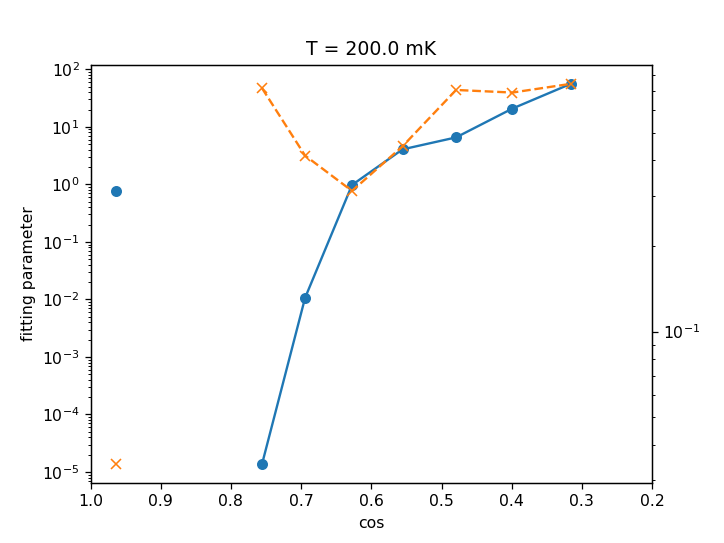

In [138]:
fig, ax = plt.subplots()

ax.plot(coss, EJs, 'o-')
# ax.set_ylim(0, 1.5)
ax.set_yscale('log')
ax2 = ax.twinx()

ax2.plot(coss, Tns, 'x--', c = 'C1')
# ax2.set_ylim(0, 1)

ax.set_xlim(1, 0.2)


ax.set_xlabel('cos')
ax.set_ylabel('fitting parameter')

ax.set_title ('T = {:2.1f} mK'.format(exp['T']*1e3) )
ax2.set_yscale('log')